In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [4]:
churn_model = pd.read_csv('/content/drive/MyDrive/Data/Churn_Modelling.csv') #reading the csv file
churn_model.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
churn_model.isnull().sum() #checking for NaN values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
customer_data = churn_model[['CustomerId', 'Surname']] #saving the customer data separately
churn_model.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace=True) #deleting the not required columns

In [7]:
churn_model.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
churn_model = pd.get_dummies(churn_model) #applying one-hot encoding on the categorical columns

In [9]:
churn_model.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


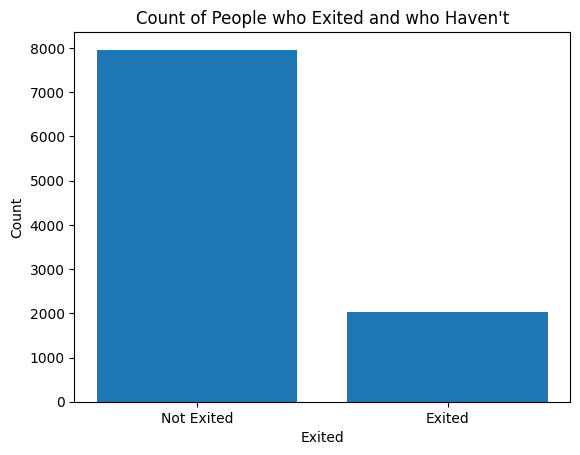

In [10]:
exit_counts = churn_model['Exited'].value_counts()

# Creating a bar plot
plt.bar(exit_counts.index, exit_counts.values)

# Adding labels and title
plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Count of People who Exited and who Haven\'t')

# Customizing x-axis tick labels
plt.xticks([0, 1], ['Not Exited', 'Exited'])

# Displaying the plot
plt.show()

In [11]:
#data splitting
X = churn_model.drop('Exited', axis = 1)
y = churn_model['Exited']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
#splitting into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [14]:
#Applying Standardization (Feature Scaling) on the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
X_train # the training set after standardization

array([[-0.22482832,  0.09984529,  1.37778936, ..., -0.57600312,
        -0.91578261,  0.91578261],
       [-0.8357854 , -0.84857831, -1.03726649, ..., -0.57600312,
        -0.91578261,  0.91578261],
       [-0.98075826,  0.66889946, -0.69225851, ...,  1.73610172,
        -0.91578261,  0.91578261],
       ...,
       [ 0.34470794, -0.37436651,  0.34276543, ..., -0.57600312,
        -0.91578261,  0.91578261],
       [ 0.36541835, -0.46920887,  1.37778936, ...,  1.73610172,
        -0.91578261,  0.91578261],
       [ 0.76927133, -1.22794775,  0.34276543, ..., -0.57600312,
        -0.91578261,  0.91578261]])

In [16]:
#Performing oversampling on the imbalanced data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

**Logistic Regression Model**

In [17]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train_resampled, y_train_resampled);

In [18]:
y_pred = log.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_score(y_test, y_pred)

0.713

In [20]:
precision_score(y_test, y_pred)

0.38850889192886456

In [21]:
recall_score(y_test, y_pred)

0.6909975669099757

In [22]:
f1_score(y_test, y_pred)

0.4973730297723292

**Random Forest Classifier Model**

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_resampled,y_train_resampled);

In [24]:
y_pred_rf = rf.predict(X_test)

In [25]:
accuracy_score(y_test, y_pred_rf)

0.8475

In [26]:
precision_score(y_test, y_pred_rf)

0.6267942583732058

In [27]:
recall_score(y_test, y_pred_rf)

0.6374695863746959

In [28]:
f1_score(y_test, y_pred_rf)

0.6320868516284681

**Support Vector Classifier Model**

In [29]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train_resampled, y_train_resampled);
y_pred_svm = svm.predict(X_test)
accuracy_score(y_test, y_pred_svm)

0.7795

In [30]:
precision_score(y_test, y_pred_svm)

0.47634069400630913

In [31]:
recall_score(y_test, y_pred_svm)

0.7347931873479319

In [32]:
f1_score(y_test, y_pred_svm)

0.5779904306220096

**XGBoost Model on both unsampled and resampled data**

In [33]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state=42, verbosity = 0)
model_xgb.fit(X_train, y_train);

In [34]:
y_pred_x = model_xgb.predict(X_test)
accuracy_score(y_test, y_pred_x)

0.8635

In [35]:
precision_score(y_test, y_pred_x)

0.7464285714285714

In [36]:
recall_score(y_test, y_pred_x)

0.5085158150851582

In [37]:
f1_score(y_test, y_pred_x)

0.6049204052098409

In [38]:
model_xgb_n = xgb.XGBClassifier(random_state=42, verbosity = 0)
model_xgb_n.fit(X_train_resampled, y_train_resampled);

In [39]:
y_pred_xgb = model_xgb_n.predict(X_test)
accuracy_score(y_test, y_pred_xgb)

0.8595

In [40]:
precision_score(y_test, y_pred_xgb)

0.6957831325301205

In [41]:
recall_score(y_test, y_pred_xgb)

0.5620437956204379

In [42]:
f1_score(y_test, y_pred_xgb)

0.6218034993270525

**Hyperparameter Tuning for XGBoost Classifier using RandomizedSearchCV**

In [43]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Defining the hyperparameter grid as a dictionary
param_dist = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
}

# Creating an XGBoost classifier
model_xgb = xgb.XGBClassifier(random_state=42, verbosity=0)

# Creating a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=model_xgb,
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to try
    scoring='f1',  # Evaluation metric
    cv=5,  # Number of cross-validation folds
    random_state=42,
    n_jobs=-1  # Use all available CPU cores for parallelism
)

# Fitting the random search to the data
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params = random_search.best_params_
best_xgb_model = random_search.best_estimator_

# Evaluating the best model
y_pred_best_xgb = best_xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_best_xgb)
precision = precision_score(y_test, y_pred_best_xgb)
recall = recall_score(y_test, y_pred_best_xgb)
f1 = f1_score(y_test, y_pred_best_xgb)

print("Best Hyperparameters:", best_params)
print("F1 Score of the Best Model:", f1)


Best Hyperparameters: {'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1}
F1 Score of the Best Model: 0.629878869448183


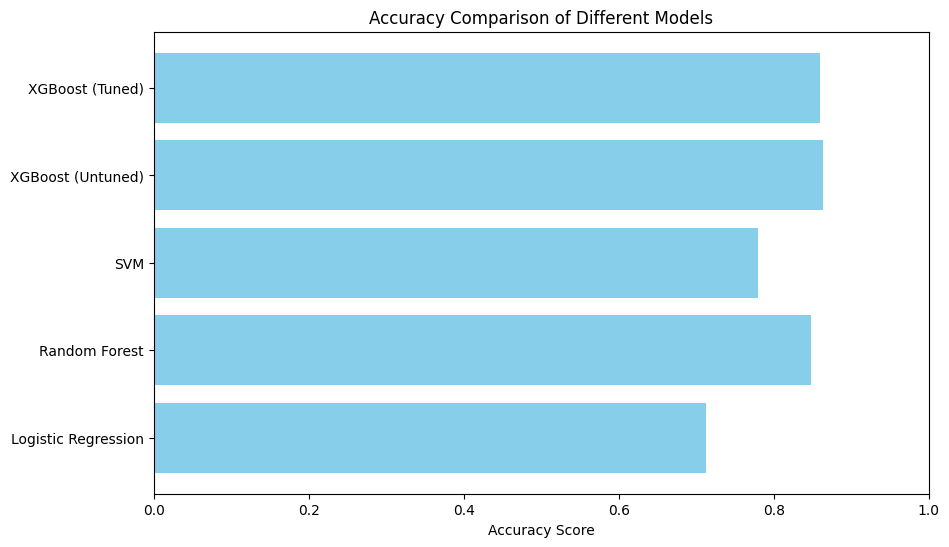

In [46]:
import matplotlib.pyplot as plt

# Accuracy scores for each model
accuracy_scores = [accuracy_score(y_test, y_pred_xgb),
                   accuracy_score(y_test, y_pred_x),
                   accuracy_score(y_test, y_pred_svm),
                   accuracy_score(y_test, y_pred_rf),
                   accuracy_score(y_test, y_pred)]

# Model names
model_names = ['XGBoost (Tuned)', 'XGBoost (Untuned)', 'SVM', 'Random Forest', 'Logistic Regression']

# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Accuracy Score')
plt.title('Accuracy Comparison of Different Models')
plt.xlim(0.0, 1.0)  # Set the x-axis limit from 0 to 1 for accuracy score
plt.gca().invert_yaxis()  # Invert the y-axis to show the best model at the top
plt.show()
